## prediting house prices based on features of house

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

prices = train['SalePrice']
features = pd.concat([train.iloc[:, 1:-1], test.iloc[:, 1:]], keys = ['train', 'test'])
print('training samples: {}'.format(train.shape[0]))
print('testing samples: {}'.format(test.shape[0]))
print('number of features: {}'.format(train.shape[1]))
features.head()

training samples: 1460
testing samples: 1459
number of features: 81


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0          60       RL         65.0     8450   Pave   NaN      Reg   
      1          20       RL         80.0     9600   Pave   NaN      Reg   
      2          60       RL         68.0    11250   Pave   NaN      IR1   
      3          70       RL         60.0     9550   Pave   NaN      IR1   
      4          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities LotConfig      ...       ScreenPorch PoolArea  \
train 0         Lvl    AllPub    Inside      ...                 0        0   
      1         Lvl    AllPub       FR2      ...                 0        0   
      2         Lvl    AllPub    Inside      ...                 0        0   
      3         Lvl    AllPub    Corner      ...                 0        0   
      4         Lvl    AllPub       FR2      ...                 0        0   

        PoolQC Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  \
train 0    NaN   NaN         NaN       0       2    2008        WD   
      1    NaN   NaN         NaN       0       5    2007        WD   
      2    NaN   NaN         NaN       0       9    2008        WD   
      3    NaN   NaN         NaN       0       2    2006        WD   
      4    NaN   NaN         NaN       0      12    2008        WD   

         SaleCondition  
train 0         Normal  
      1         Normal  
      2         Normal  
      3        Abnorml  
      4         Normal  

[5 rows x 79 columns]

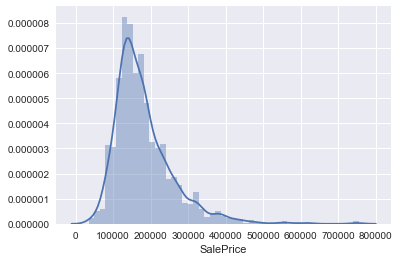

In [3]:
sb.distplot(prices);

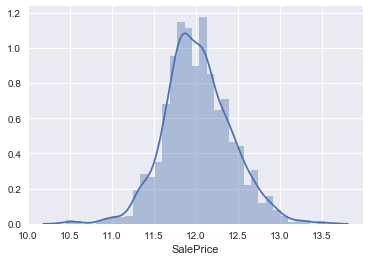

In [4]:
prices = np.log1p(prices) # log transform prices since it is positively skewed.
sb.distplot(prices);

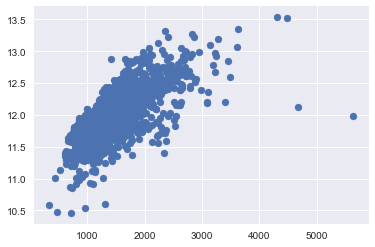

In [5]:
plt.scatter(features.loc['train', 'GrLivArea'], prices); #looks like we have two outliers, leave them for now

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (train, 0) to (test, 1458)
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior

Let's examine these features.

- **Some of the features are categorical, but showing as number**. MSSubClass, type of dwelling, is a categorical variable, so change the dtype into object, same with MoSold (month sold).

- **Some of the features are ordinal**. For example, ExterQual means quality of exterior, it has several levels: excellent, good, average, fair, poor. Apparently if we treat it as only categorical, we lose some information.

In [7]:
features['MSSubClass'] = features['MSSubClass'].astype(object)
features['MoSold'] = features['MoSold'].astype(object)
features = features.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                             50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                             80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                             150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                             "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                         7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                            })
features = features.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                             "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "BsmtQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                             "BsmtCond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                             "BsmtFinType1" : {"Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                             "BsmtFinType2" : {"Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                             "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
                             "FireplaceQu" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "GarageQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "GarageCond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                             "PoolQC" : {"Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                             "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                           )

Next we have to deal with the NA values.

In [8]:
features.isnull().sum().sort_values(ascending=False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
dtype: int64

According to the data description, the NA values in PoolQC, MiscFeature, Alley, Fence, FireplaceQu, Garage-related features, Bsmt-related features mean *Does not exist*. So we can safely fill them with None or 0, depending on whether it is categorical type or numerical type.

Now the LotFrontage has 486 missing values, these are real NA values. Since it is relatively a small portion, here we repopulate them with mean value.

In [9]:
features['PoolQC'] = features['PoolQC'].fillna(0)
features['MiscFeature'] = features['MiscFeature'].fillna('None')
features['Alley'] = features['Alley'].fillna(0)
features['Fence'] = features['Fence'].fillna('None')
features['FireplaceQu'] = features['FireplaceQu'].fillna(0)

features['GarageCond'] = features['GarageCond'].fillna(0)
features['GarageQual'] = features['GarageQual'].fillna(0)
features['GarageYrBlt'] = features['GarageYrBlt'].fillna(0) # this is weird lol
features['GarageFinish'] = features['GarageFinish'].fillna('None')
features['GarageType'] = features['GarageType'].fillna('None')

features['BsmtCond'] = features['BsmtCond'].fillna(0)
features['BsmtExposure'] = features['BsmtExposure'].fillna(0)
features['BsmtQual'] = features['BsmtQual'].fillna(0)
features['BsmtFinType2'] = features['BsmtFinType2'].fillna(0)
features['BsmtFinType1'] = features['BsmtFinType1'].fillna(0)

features['MasVnrType'] = features['MasVnrType'].fillna(0)
features['MasVnrArea'] = features['MasVnrArea'].fillna(0)
features['BsmtFullBath'] = features['BsmtFullBath'].fillna(0)
features['BsmtHalfBath'] = features['BsmtHalfBath'].fillna(0)

features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

In [10]:
features = features.fillna(features.mean()) # fill numerical values

In [11]:
features.isnull().sum().sort_values(ascending=False).head(6)

MSZoning       4
SaleType       1
Exterior1st    1
Electrical     1
Exterior2nd    1
BsmtQual       0
dtype: int64

So we still have some missing value for categorical features, of course we can leave them as they are, and later create a dummy variable for that None type. However this would introduce some kind of bias into our data set. So let's try to fill them with the mode of that feature.

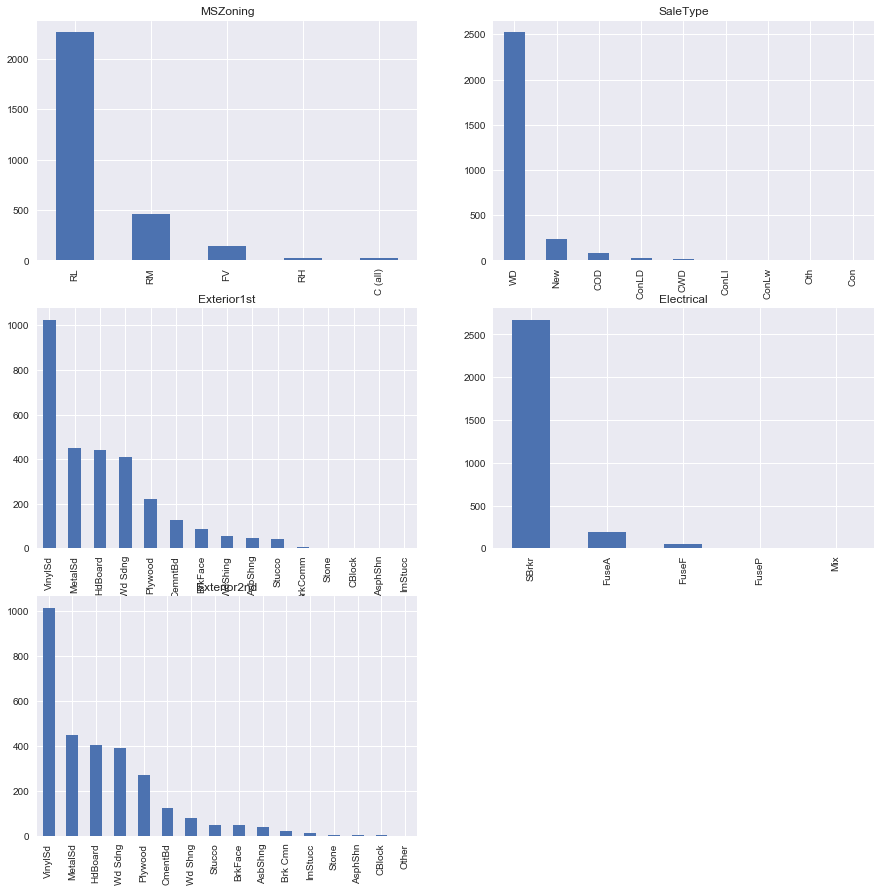

In [12]:
cols = ['MSZoning', 'SaleType', 'Exterior1st', 'Electrical', 'Exterior2nd']
plt.figure(figsize=(15,15))
for i, col in enumerate(cols):
    plt.subplot(3,2,i+1)
    features[col].value_counts().plot(kind='bar')
    plt.title(col);

In [13]:
features['MSZoning'] = features['MSZoning'].fillna('RL')
features['SaleType'] = features['SaleType'].fillna('WD')
features['Exterior1st'] = features['Exterior1st'].fillna('VinylSd')
features['Electrical'] = features['Electrical'].fillna('SBrkr')
features['Exterior2nd'] = features['Exterior2nd'].fillna('VinylSd')

## check correlation

As for now, we have 28 categorical features, 51 numerical features.

Based on common sense, the most promising features when trying to predict the price of a house are size, overall quality, number of bedrooms, number of bathrooms, location, year built, basement size, garage.

In [14]:
# cmap = sb.choose_diverging_palette(as_cmap=True) # interactive widget of colormap

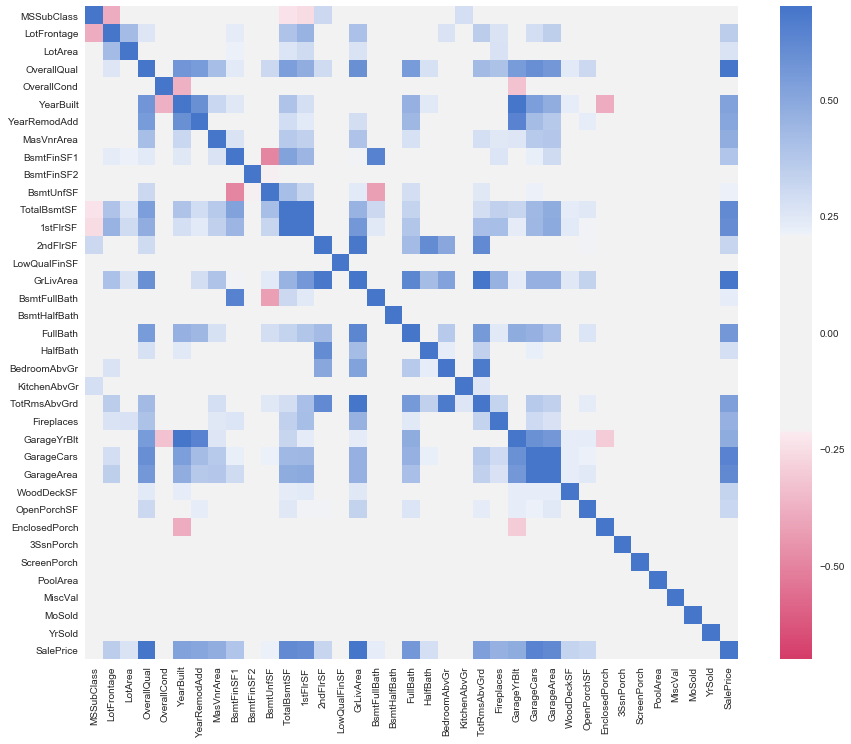

In [15]:
#correlation matrix
corr_mat = train.iloc[:, 1:].corr()
cmap = sb.diverging_palette(0, 255, sep=77, as_cmap=True)

plt.subplots(figsize=(15, 12))
sb.heatmap(corr_mat, vmax=0.7, square=True, cmap=cmap);

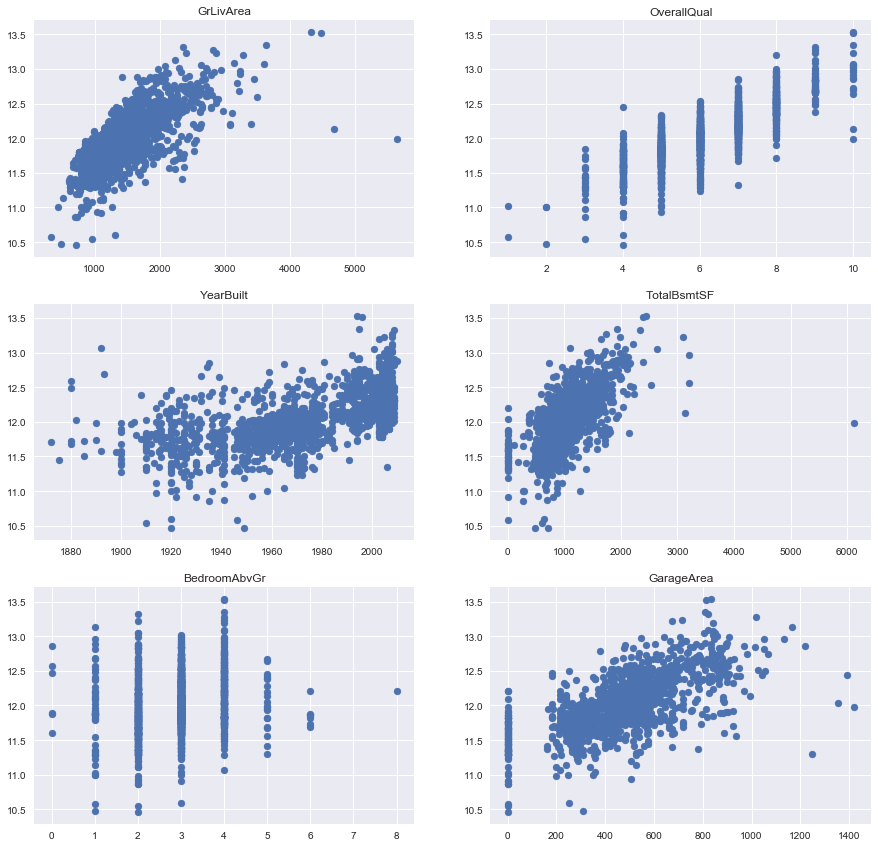

In [16]:
cols = ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'BedroomAbvGr', 'GarageArea']
plt.figure(figsize=(15, 20))
for i in range(len(cols)):
    plt.subplot(4, 2, i+1)
    col = cols[i]
    plt.scatter(features.loc['train', col], prices);
    plt.title(col)

We will get into feature selection later. For now, let's log transfomr skewed features first, then build a simple linear model using all of the features.

### log transform skewed features

In [17]:
numeric_features = features.dtypes[features.dtypes != "object"].index
skewed_features = features[numeric_features].apply(lambda x: skew(x)) #compute skewness
skewed_features = skewed_features[skewed_features > 0.75].index

In [18]:
skewed_features

Index(['LotFrontage', 'LotArea', 'Alley', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal'],
      dtype='object')

Even though we converted the ordinal features into numerical ones, there is really no need to care about their skewness since there are very limited range of values to form a trustable distribution. So here we leave them out.

In [19]:
skewed_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtExposure', 'BsmtFinSF1', 
                   'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                   'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [20]:
features[skewed_features] = np.log1p(features[skewed_features])

## Modelling

### Ridge

In [21]:
X = pd.get_dummies(features)
X_train = X.loc['train']
X_test = X.loc['test']
y = prices[:, np.newaxis]
print('Number of features now: {}'.format(X_train.shape[1]))

Number of features now: 262


In [22]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LassoLarsCV
from sklearn.metrics import mean_squared_error
def get_rmse(prediction, true):
    return np.sqrt(mean_squared_error(y_true=true, y_pred=prediction))

In [23]:
model_ridge = RidgeCV(alphas = (0.05, 0.1, 0.3, 1, 2, 3, 4, 5, 6, 10, 15, 30, 50, 75), cv=10).fit(X_train, y)

In [24]:
ridge_predict = model_ridge.predict(X_train)
get_rmse(ridge_predict, y)

0.10732082939819054

### Lasso

In [25]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [26]:
lasso_predict = model_lasso.predict(X_train)
get_rmse(lasso_predict, y)

0.10637683001402588

In [27]:
print('Lasso picked {0} features, eliminated {1} features'.
      format(sum(model_lasso.coef_ != 0), sum(model_lasso.coef_ == 0)))

Lasso picked 109 features, eliminated 153 features


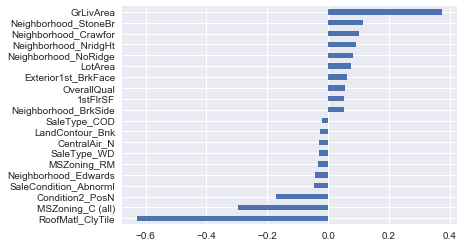

In [28]:
coef = pd.Series(model_lasso.coef_, index=X_train.columns)
important_features = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
important_features.plot(kind='barh');

### Elastic net

In [29]:
model_elas = ElasticNetCV(alphas=[1e-4, 5e-4, 6e-4, 7e-4, 0.001, 0.01, 0.1, 1, 10],
                          l1_ratio=[0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1], max_iter=5000,
                         cv=10, n_jobs=-1).fit(X_train, y)

Here we provided a range of alpha and l1_ratio, let's see the result.

In [30]:
elastic_predict = model_elas.predict(X_train)
get_rmse(elastic_predict, y)

0.10573837354217192

In [31]:
model_elas.l1_ratio_

0.69999999999999996

In [32]:
model_elas.alpha_

0.00059999999999999995

In [33]:
sum(model_elas.coef_ != 0)

114

## output prediction

In [34]:
preds = (model_ridge.predict(X_test).ravel() + model_elas.predict(X_test) + model_lasso.predict(X_test)) / 3
preds = np.expm1(preds)
solution = pd.DataFrame(data=preds, index=test.Id, columns=['SalePrice'])
solution.to_csv("my_sol.csv", index = True)

0.12303 in kaggle leaderboard. As a baseline model, it is not bad.

## What's next?
Exclude some of the features, train them again
try out random forest, xgboost, gradient boosting
try neural network/deep learning